<a href="https://colab.research.google.com/github/Vaishnavi-Hegde17/Deep_Learning-and-Gen_AI-Lab/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, lr=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.lr = lr
        self.epochs = epochs

    def activate(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        z = self.weights.T.dot(x)
        a = self.activate(z)
        return a

    def fit(self, X, y):
        for _ in range(self.epochs):
            for i in range(y.shape[0]):
                x = np.insert(X[i], 0, 1)  # Add bias term
                y_pred = self.predict(x)
                e = y[i] - y_pred
                self.weights = self.weights + self.lr * e * x

# Example for AND gate
X_and = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_and = np.array([0, 0, 0, 1])

perceptron_and = Perceptron(input_size=2)
perceptron_and.fit(X_and, y_and)

print("AND Gate Predictions:")
for i in range(X_and.shape[0]):
    x = np.insert(X_and[i], 0, 1)
    print(f"Input: {X_and[i]}, Prediction: {perceptron_and.predict(x)}")

# Example for OR gate
X_or = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_or = np.array([0, 1, 1, 1])

perceptron_or = Perceptron(input_size=2)
perceptron_or.fit(X_or, y_or)

print("\nOR Gate Predictions:")
for i in range(X_or.shape[0]):
    x = np.insert(X_or[i], 0, 1)
    print(f"Input: {X_or[i]}, Prediction: {perceptron_or.predict(x)}")

# Example for NOT gate (requires input size 1)
X_not = np.array([
    [0],
    [1]
])
y_not = np.array([1, 0])

perceptron_not = Perceptron(input_size=1)
perceptron_not.fit(X_not, y_not)

print("\nNOT Gate Predictions:")
for i in range(X_not.shape[0]):
    x = np.insert(X_not[i], 0, 1)
    print(f"Input: {X_not[i]}, Prediction: {perceptron_not.predict(x)}")


AND Gate Predictions:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1

OR Gate Predictions:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1

NOT Gate Predictions:
Input: [0], Prediction: 1
Input: [1], Prediction: 0


[[11. 47.]]
[-72.]
accuracy score is 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

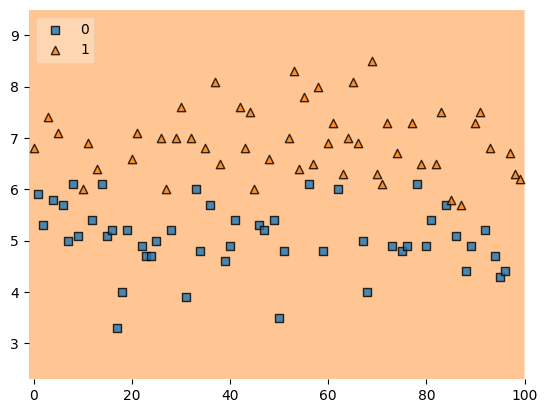

In [4]:

# Single unit perceptron
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
df=pd.read_csv('/content/placement.csv')
X = df.iloc[:,0:2]
y = df.iloc[:,-1]
p = Perceptron()
p.fit(X,y)
print(p.coef_)
print(p.intercept_)
z=p.score(X,y)
print("accuracy score is",z)
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf=p, legend=2)

[[2. 2.]]
[-2.]
[[2. 2.]]
[-1.]
[[0. 0.]]
[0.]


<Axes: >

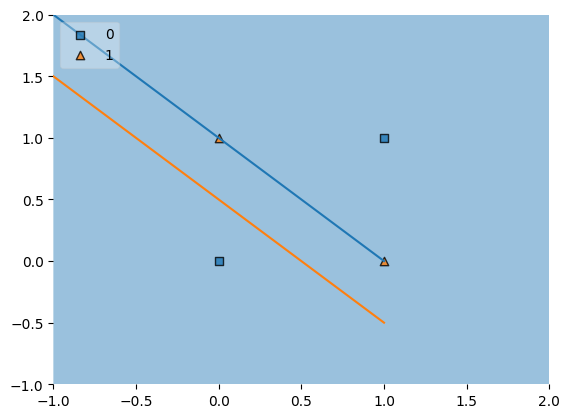

In [6]:
# Perceptron on Or-, And- and Xor-ed data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()
or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['ouput']=[1,1,1,0]
and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['ouput']=[1,0,0,0]
xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['ouput']=[0,1,1,0]
from sklearn.linear_model import Perceptron
clf1=Perceptron()
clf2=Perceptron()
clf3=Perceptron()
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
print(clf1.coef_)
print(clf1.intercept_)
x=np.linspace(-1,1,5)
y=-x+1
plt.plot(x,y)
#sns.scatterplot(and_data['input1'],and_data['input2'],hue=and_data['ouput'],s=200)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
print(clf2.coef_)
print(clf2.intercept_)
x1=np.linspace(-1,1,5)
y1=-x+0.5
plt.plot(x1,y1)
#sns.scatterplot(or_data['input1'],or_data['input2'],hue=or_data['ouput'],s=200)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)
print(clf3.coef_)
print(clf3.intercept_)
plot_decision_regions(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values,clf=clf3, legend=2)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Accuracy: 100.00%


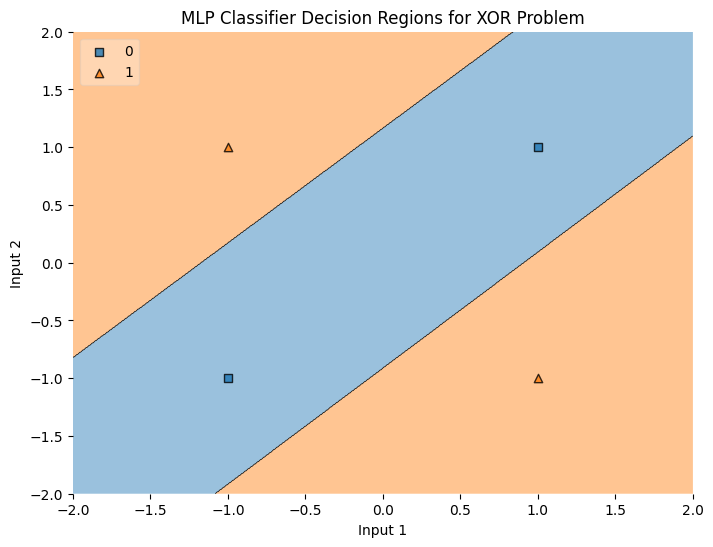

In [7]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import pandas as pd
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
mlp = MLPClassifier(hidden_layer_sizes=(3), activation='relu', max_iter=10000, solver='adam', random_state=42)
mlp.fit(X_scaled, y)
accuracy = mlp.score(X_scaled, y)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
plt.figure(figsize=(8, 6))
# Reshape y to be a 1D array
plot_decision_regions(X=X_scaled, y=y.ravel(), clf=mlp, legend=2)
plt.title('MLP Classifier Decision Regions for XOR Problem')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()